# Data Loading 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install Scikit-plot

In [ ]:
!pip install mlxtend

In [ ]:
import numpy as np 
import os
import pandas as pd
# for graphs
import matplotlib.pyplot as plt
import seaborn as sns
# provides various functions that work on iterators to produce complex iterators
import itertools
# to generate random numbers
import random
# for creating static, animated, and interactive visualizations
import matplotlib.gridspec as gridspec 
from sklearn.preprocessing import LabelEncoder
# To divide data in training and testing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import scikitplot.metrics as splt

In [ ]:
Dataset_PATH="/content/drive/MyDrive/Quiz/Sensor1_values_instant_1000.csv"


In [ ]:
df=pd.read_csv(Dataset_PATH)

In [ ]:
df.head(20)

,epoch,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel,Label
0,0,11.375000,11.307097,-0.103000,Normal
1,1,11.366708,11.255964,-0.353946,Normal
2,2,11.362331,11.249115,-0.090962,Normal
3,3,11.358665,11.263280,-0.043470,Normal
4,4,11.356745,11.270361,-0.037579,Normal
5,5,11.355560,11.255544,-0.039736,Normal
6,6,11.352391,11.252807,-0.074363,Normal
7,7,11.345548,11.243613,4.448259,Normal
8,8,11.338387,11.229733,-0.036495,Normal
9,9,11.333985,11.224630,-0.054609,Normal


In [ ]:
# Get the number of rows in the dataframe
n_rows = df.shape[0]

# Create a random index array of the same length as the number of rows
rand_index = np.random.permutation(n_rows)

# Use the random index array to reorder the dataframe
df = df.iloc[rand_index]

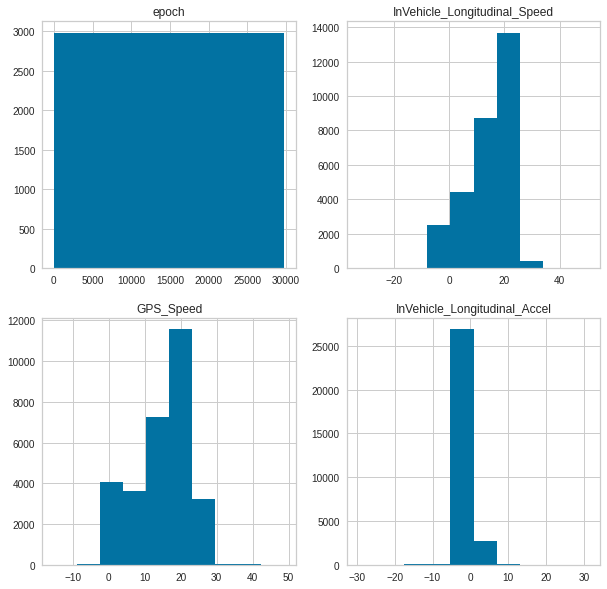

In [ ]:
# Visualize the distribution of each feature using a histogram
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs = axs.ravel()

for i, col in enumerate(df.columns[:-1]):
    axs[i].hist(df[col])
    axs[i].set_title(col)

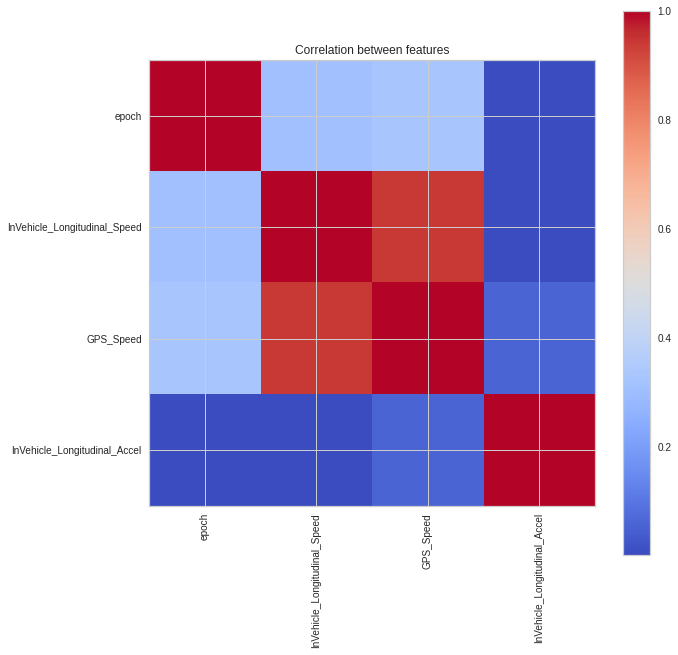

In [ ]:
# Visualize the correlation between features using a heatmap
corr = df.corr()
plt.figure(figsize=(10, 10))
plt.title('Correlation between features')
plt.imshow(corr, cmap='coolwarm')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

In [ ]:
# Count the number of null values in each column
null_counts = df.isnull().sum()

# Print the null value counts
print(null_counts)

epoch                           0
InVehicle_Longitudinal_Speed    0
GPS_Speed                       0
InVehicle_Longitudinal_Accel    0
Label                           0
dtype: int64


Print the summary of data frame.

In [ ]:
print(df.describe())

              epoch  InVehicle_Longitudinal_Speed     GPS_Speed  \
count  29800.000000                  29800.000000  29800.000000   
mean   14899.500000                     14.600262     14.698049   
std     8602.663347                      7.543176      7.453358   
min        0.000000                    -33.098820    -15.248699   
25%     7449.750000                      9.488650      9.931482   
50%    14899.500000                     16.744594     16.775469   
75%    22349.250000                     19.439555     19.377965   
max    29799.000000                     50.601087     48.854057   

       InVehicle_Longitudinal_Accel  
count                  29800.000000  
mean                      -0.016167  
std                        1.418155  
min                      -29.651329  
25%                       -0.222600  
50%                       -0.006000  
75%                        0.242327  
max                       31.311922  


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [ ]:

# Separate the features (X) and target variable (y)
X = df.drop('Label', axis=1)
y = df['Label']


# Scale the features to a range between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply feature selection to the scaled features
selector = SelectKBest(chi2, k=3)
X_new = selector.fit_transform(X_scaled, y)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

     Anomaly       0.96      0.56      0.71       114
      Normal       0.99      1.00      1.00      5846

    accuracy                           0.99      5960
   macro avg       0.97      0.78      0.85      5960
weighted avg       0.99      0.99      0.99      5960

[[  64   50]
 [   3 5843]]


In [ ]:
from yellowbrick.classifier import ClassificationReport


              precision    recall  f1-score   support

     Anomaly       0.96      0.56      0.71       114
      Normal       0.99      1.00      1.00      5846

    accuracy                           0.99      5960
   macro avg       0.97      0.78      0.85      5960
weighted avg       0.99      0.99      0.99      5960



/usr/local/lib/python3.9/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/numpy/lib/arraysetops.py:604: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len

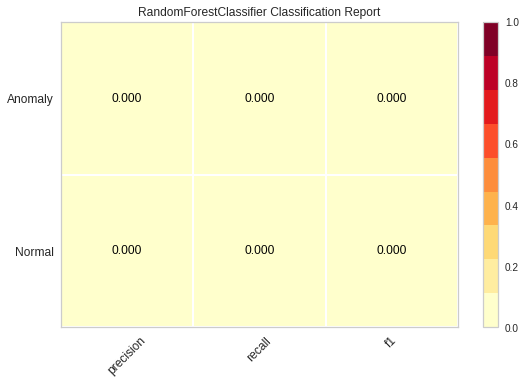

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

# Plot the classification report
report = ClassificationReport(rf_classifier, classes=['Normal', 'Anomaly'])
report.score(X_test, y_test)
report.show()

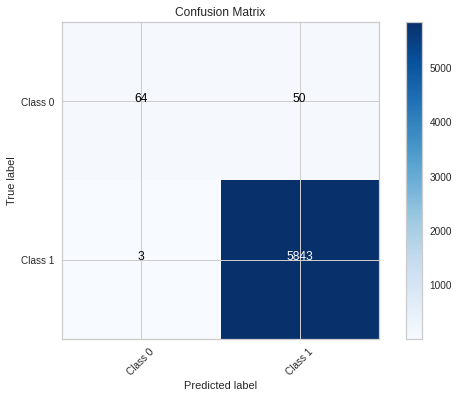

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels and color map
classes = ['Class 0', 'Class 1']
cmap = plt.cm.Blues

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations to each cell
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Impelmenting Ensemble 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
# Create an AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=100)

# Fit the classifier to the training data
ada_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ada_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Anomaly       0.91      0.18      0.31       114
      Normal       0.98      1.00      0.99      5846

    accuracy                           0.98      5960
   macro avg       0.95      0.59      0.65      5960
weighted avg       0.98      0.98      0.98      5960



In [ ]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[  21   93]
 [   2 5844]]


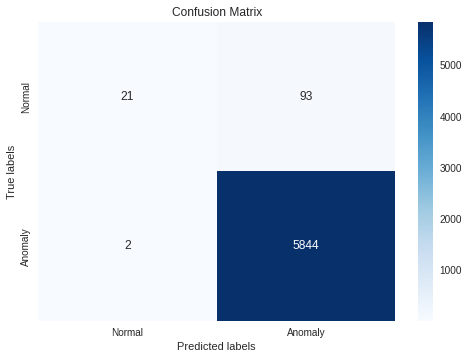

In [ ]:
# Plot the confusion matrix
fig, ax = plt.subplots()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Anomaly'])
ax.yaxis.set_ticklabels(['Normal', 'Anomaly'])
plt.show()
